## Neural Networks

## XNOR


In [1]:
import numpy as np
from src.si.data.dataset import Dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[1], [0], [0], [1]])
dataset = Dataset(X,y,['X1','X2'],'X1 XNOR X2')

In [2]:
dataset.toDataframe()

,X1,X2,X1 XNOR X2
0,0,0,1
1,0,1,0
2,1,0,0
3,1,1,1


In [3]:

from src.si.supervised.neuralnet import NN, Dense, Activation
from src.si.util.activation import Sigmoid
from src.si.util.util import sigmoid, cross_entropy, cross_entropy_prime

In [4]:
# layer1 weights
w1 = np.array([[20,-20],[20,-20]])
b1 = np.array([[-30, 10]])
l1 = Dense(2, 2)
l1.setWeights(w1,b1)

In [5]:

# layer2 weights
w2 = np.array([[20],[20]])
b2 = np.array([[-10]])
l2 = Dense(2, 1)
l2.setWeights(w2,b2)

In [6]:
# Build the NN
nn = NN()
nn.add(l1)
nn.add(Activation(Sigmoid()))
nn.add(l2)
nn.add(Activation(Sigmoid()))
# pass the info that the model is fitted
nn.is_fitted = True #para nao dar o erro de nao ter passado pelo fit

In [7]:
np.round(nn.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [8]:
nn.cost(dataset.X,dataset.Y)

2.066588540474394e-09

## Train the model using backpropagation

In [9]:
nn2 = NN(epochs=100000,lr=0.1, verbose=False)
nn2.add(Dense(2, 2))
nn2.add(Activation(Sigmoid()))
nn2.add(Dense(2, 1))
nn2.add(Activation(Sigmoid()))
# use cross entropy instead of MSE as loss function
# nn2.use(cross_entropy,cross_entropy_prime)

In [10]:
nn2.fit(dataset)

h 10277/100000 error = 0.05392211834251265epoch 11241/100000 error = 0.028199348339721084epoch 12255/100000 error = 0.0171041932689699epoch 13178/100000 error = 0.012167092940892715epoch 13796/100000 error = 0.010092130405248626epoch 14230/100000 error = 0.00898198587661455epoch 15028/100000 error = 0.007433565956834892epoch 15667/100000 error = 0.006509481875119467epoch 16364/100000 error = 0.00571760404658995epoch 16952/100000 error = 0.005177053060573097epoch 17711/100000 error = 0.004606174615371272epoch 18243/100000 error = 0.004271698410149726epoch 18896/100000 error = 0.003918733143980293epoch 19876/100000 error = 0.003481474894287386epoch 20790/100000 error = 0.003149479529032413epoch 21566/100000 error = 0.0029113909962455125epoch 22616/100000 error = 0.002638872740451738epoch 23503/100000 error = 0.002443874501424981epoch 23969/100000 error = 0.00235203962440791epoch 24524/100000 error = 0.0022508957580718372epoch 25255/100000 error = 0.002129694948270875epoch 26664/100000 er

In [11]:
np.round(nn2.predict(X))

array([[1.],
       [0.],
       [0.],
       [1.]])

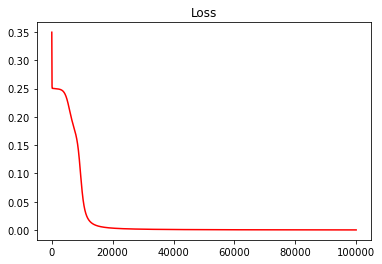

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(nn2.history.keys()), list(nn2.history.values()), '-', color='red')
plt.title('Loss')
plt.show()

In [13]:
np.round(nn2.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [14]:
nn2.cost(dataset.X,dataset.Y)


0.00030313541337969625